## Analyzing Health Factors: Predicting Diabetes and Age

In this project, we'll explore how various health-related factors contribute to two important outcomes: diabetes and an individual's age. We'll use a subset of a real-world dataset from the CDC ([available here](https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system)) that contains medical and lifestyle information of adults in the United States. Specifically, the dataset was collected by the Behavioral Risk Factor Surveillance System (BRFSS), which conducts health-related telephone surveys across all 50 states and other US territories.

The goal of this project is to build and train neural networks with PyTorch for the following tasks:

🎯 **1. Classification to Predict Diabetes** 

- Chronic diseases like diabetes are among the leading causes of death worldwide. Early detection is crucial for timely intervention to allow health professionals to provide treatments such as lifestyle modification, prescribing medication, and resource planning. By building a classification model to predict diabetes using easily measurable health factors obtained via telephone screening, we hope to assist health professionals in identifying individuals who may be at high risk of developing diabetes before a formal diagnosis. 


📅 **2. Regression to Predict Age** 

- Predicting one's age can offer valuable insights into how medical and lifestyle factors correlate with _biological aging_ patterns. Differences between one's predicted age and actual age may provide signals of underlying health issues that result in accelerated aging.

Together, these predictive tasks can offer insights into how machine learning models can assist health professionals in detecting diseases and health problems early on, creating timely treatment plans, and improving health outcomes.

**Note:** The models and analyses in this project notebook are built and trained on a limited dataset that may not be generalized well to the broader population or clinical settings. Therefore, the models are not intended for real-world medical applications and should not be relied upon for diagnosing, predicting, or managing diabetes or any other health outcomes. Any health-related decisions should always be made with the guidance of a qualified healthcare professional!

#### Dataset Column Summary

- **Diabetes:** Whether the individual has "No Diabetes", "Prediabetes", or "Diabetes"
- **HighBP:** Whether the individual has high blood pressure ("Yes" or "No")
- **HighChol:** Whether the individual has high cholesterol ("Yes" or "No")
- **CholCheck:** Whether the individual had their cholesterol checked in the past 5 years ("Yes" or "No")
- **BMI:** Body Mass Index, a measure of body fat based on height and weight
- **Smoker:** Whether the individual is a current smoker ("Yes" or "No")
- **Stroke:** Whether the individual has ever had a stroke ("Yes" or "No")
- **HeartDiseaseorAttack:** Whether the individual has ever had coronary heart disease or a heart attack ("Yes" or "No")
- **PhysActivity:** Whether the individual engaged in physical activity in the past 30 days ("Yes" or "No")
- **Fruits:** Whether the individual consumes fruits at least once per day ("Yes" or "No")
- **Veggies:** Whether the individual consumes vegetables at least once per day ("Yes" or "No")
- **HvyAlcoholConsump:** Heavy alcohol consumption indicator ("Yes" or "No")
- **AnyHealthcare:** Whether the individual has any form of healthcare coverage ("Yes" or "No")
- **NoDocbcCost:** Whether the individual could not see a doctor in the past year because of cost ("Yes" or "No")
- **GenHlth:** General health status reported on a 1–5 scale (1 = excellent, 5 = poor)
- **MentHlth:** Number of days mental health was not good during the past 30 days
- **PhysHlth:** Number of days physical health was not good during the past 30 days
- **DiffWalk:** Whether the individual has serious difficulty walking or climbing stairs ("Yes" or "No")
- **Sex:** Female or Male
- **Age:** Age group of the individual (13-level group)
- **Education:** Education level attained 
- **Income:** Income category of the individual


#### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style='whitegrid', palette='Paired')
import matplotlib.pyplot as plt
%matplotlib inline

#### Load and Inspect Data

In [ ]:
diabetes_data = pd.read_csv("datasets/diabetes_BRFSS2015.csv")
diabetes_data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,Yes,Yes,Yes,40.0,Yes,No,No,No,No,Yes,...,No,5.0,18.0,15.0,Yes,Female,60-64,Grade 12 or GED (High school graduate),"Less than $20,000",No Diabetes
1,No,No,No,25.0,Yes,No,No,Yes,No,No,...,Yes,3.0,0.0,0.0,No,Female,50-54,College 4+ years (College graduate),"Less than $10,000",No Diabetes
2,Yes,Yes,Yes,28.0,No,No,No,No,Yes,No,...,Yes,5.0,30.0,30.0,Yes,Female,60-64,Grade 12 or GED (High school graduate),"$75,000 or more",No Diabetes
3,Yes,No,Yes,27.0,No,No,No,Yes,Yes,Yes,...,No,2.0,0.0,0.0,No,Female,70-74,Grades 9-11 (Some high school),"Less than $50,000",No Diabetes
4,Yes,Yes,Yes,24.0,No,No,No,Yes,Yes,Yes,...,No,2.0,3.0,0.0,No,Female,70-74,College 1-3 years (Some college/technical school),"Less than $25,000",No Diabetes


In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  object 
 1   HighChol              253680 non-null  object 
 2   CholCheck             253680 non-null  object 
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  object 
 5   Stroke                253680 non-null  object 
 6   HeartDiseaseorAttack  253680 non-null  object 
 7   PhysActivity          253680 non-null  object 
 8   Fruits                253680 non-null  object 
 9   Veggies               253680 non-null  object 
 10  HvyAlcoholConsump     253680 non-null  object 
 11  AnyHealthcare         253680 non-null  object 
 12  NoDocbcCost           253680 non-null  object 
 13  GenHlth               253680 non-null  float64
 14  MentHlth              253680 non-null  float64
 15  

#### Data Exploration and Visualization

Let's first count and visualize the diabetes status of all the people in the dataset (that includes no diabetes, prediabetes, and diabetes).

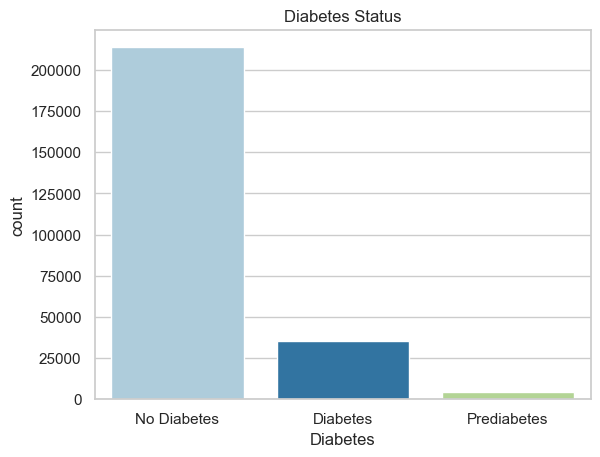

Diabetes
No Diabetes    213703
Diabetes        35346
Prediabetes      4631
Name: count, dtype: int64

Diabetes
No Diabetes    0.842412
Diabetes       0.139333
Prediabetes    0.018255
Name: proportion, dtype: float64


In [ ]:
# Plot Diabetes Status
sns.countplot(x='Diabetes', data=diabetes_data)
plt.title('Diabetes Status')
plt.show()

print(diabetes_data['Diabetes'].value_counts(0))
print()
print(diabetes_data['Diabetes'].value_counts(1))

Of the 253,680 people surveyed in this dataset, about **13.9%** have diabetes, and 1.8% have prediabetes. 

Importantly, these percentages do not fully reflect the true real-world statistic. Per the CDC as of 2021, about 38.4 million people (11.6%) in the US have diabetes.

For this project, we'll specifically be building a binary classifier that predicts whether or not a person will develop diabetes, so we'll drop the rows for those labeled as prediabetic.

**Note:** In future work, we can train a multi-class classifier to predict all three categories!

In [ ]:
# Remove individuals with prediabetes
diabetes_data = diabetes_data[diabetes_data['Diabetes'] != 'Prediabetes']

In [ ]:
# Binary encode `Diabetes` column - {'No Diabetes':0, 'Diabetes':1}
diabetes_data['Diabetes'] = diabetes_data['Diabetes'].replace({'No Diabetes':0, 'Diabetes':1})

Next, let's explore the prevalence of diabetes across different groups.

**Diabetes Status by Sex**

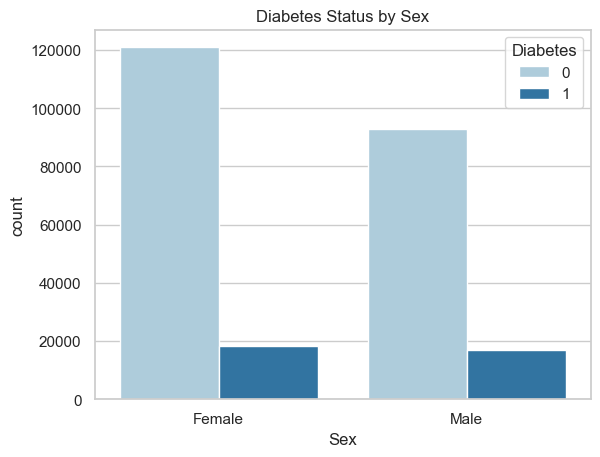

Sex
Female    0.132102
Male      0.154405
Name: Diabetes, dtype: float64

In [ ]:
# Plot Diabetes Status by Sex
sns.countplot(x='Sex', hue='Diabetes', data=diabetes_data)
plt.title('Diabetes Status by Sex')
plt.show()

# Calculate percentage of Diabetes Status by Sex
diabetes_data.groupby('Sex')['Diabetes'].mean()

It looks like the prevalence of diabetes is slightly higher in males than females:
- 15.4% of males have diabetes
- 13.2% of females have diabetes

**Diabetes Status by Age Group**

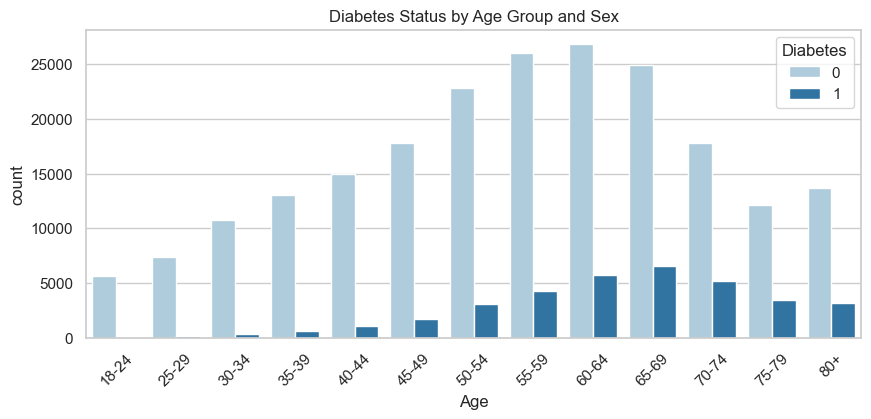

Age
18-24    0.013735
25-29    0.018558
30-34    0.028414
35-39    0.045757
40-44    0.065712
45-49    0.089301
50-54    0.119246
55-59    0.140777
60-64    0.176172
65-69    0.208210
70-74    0.224194
75-79    0.219054
80+      0.189769
Name: Diabetes, dtype: float64

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 4))

# Plot Diabetes Status by Age Group and Sex
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
sns.countplot(x='Age', hue='Diabetes', data=diabetes_data, order=age_order)
plt.title('Diabetes Status by Age Group and Sex')
plt.xticks(rotation=45)
plt.show()

# Calculate percentage of diabetes by age group
diabetes_data.groupby('Age')['Diabetes'].mean()

Interestingly, it looks like there is a steady _increase_ in the prevalence of diabetes with age:

1. There is an increase in prevalence acceleration around middle age, starting from **30-34** (4.6%) to **60-64** (17.6%).
    - We know that insulin resistance and metabolic syndrome typically develop over decades, starting in your ~30s.
2. There is a peak in older adults around **70-74** (22.4%)
3. There is a slight decrease in the oldest group, **80+** (19.0%), which might be attributed to:
    - Survivorship bias: individuals who live past 80 may generally be healthier
    - Selective mortality: individuals with severe chronic illnesses may have already passed away before 80
    - Unequal bin sizing: the oldest group **80+** may include individuals over 85, 90, 100+!

**Diabetes Status by High Blood Pressure**

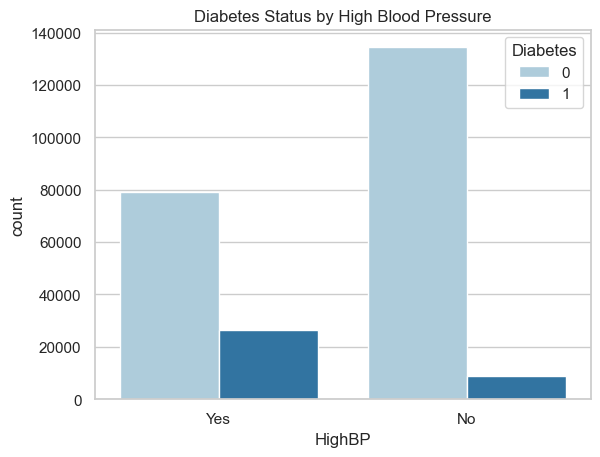

HighBP
No     0.061076
Yes    0.251180
Name: Diabetes, dtype: float64

In [ ]:
# Plot Diabetes Status by High Blood Pressure
sns.countplot(x='HighBP', hue='Diabetes', data=diabetes_data)
plt.title('Diabetes Status by High Blood Pressure')
plt.show()

# Calculate percentage of Diabetes Status by High Blood Pressure
diabetes_data.groupby('HighBP')['Diabetes'].mean()

The high blood pressure data shows a strong association with diabetes:
- 25.1% of individuals with high blood pressure have diabetes
- 6% of individuals without high blood pressure have diabetes

This is expected as there are many research studies that suggest high blood pressure and diabetes are closely linked. 

**Diabetes by Healthcare Coverage**

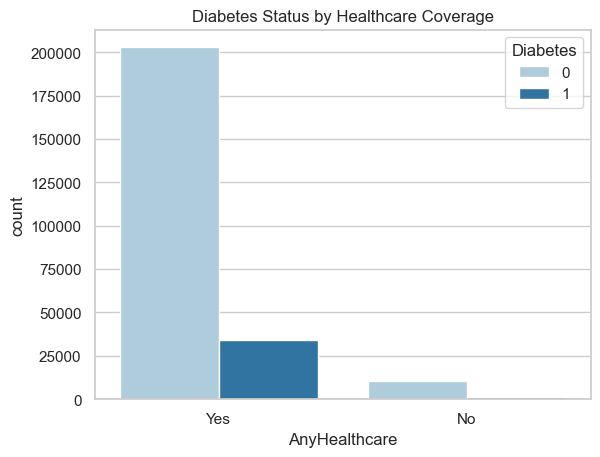

AnyHealthcare
Yes    0.951162
No     0.048838
Name: proportion, dtype: float64


AnyHealthcare
No     0.116912
Yes    0.143208
Name: Diabetes, dtype: float64

In [ ]:
# Plot Diabetes Status by Healthcare Coverage
sns.countplot(x='AnyHealthcare', hue='Diabetes', data=diabetes_data)
plt.title('Diabetes Status by Healthcare Coverage')
plt.show()

# Calculate percentage of diabetes by sex
print(diabetes_data['AnyHealthcare'].value_counts(1))
diabetes_data.groupby('AnyHealthcare')['Diabetes'].mean()

There is a significantly higher number of individuals with healthcare than without healthcare coverage (95.1% vs 4.9%). But interestingly, it looks there is a slight increase in the prevalence of diabetes in those with healthcare coverage:
- 11.7% of individuals without healthcare coverage have diabetes
- 14.3% of individuals with healthcare coverage have diabetes

You might think that people _without_ healthcare would have _higher_ diabetes rates because of less access to preventative care. But this actually makes sense for a few reasons:
- People with healthcare are more likely to be screened for diabetes
    - No healthcare coverage ==> less likely to be screened ==> may have diabetes but not know it
- People with chronic illnesses are likely to seek out healthcare (and get screened for diabetes)

**Diabetes Status by Other Binary Factors**

Other binary factors to consider: `['HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']`.

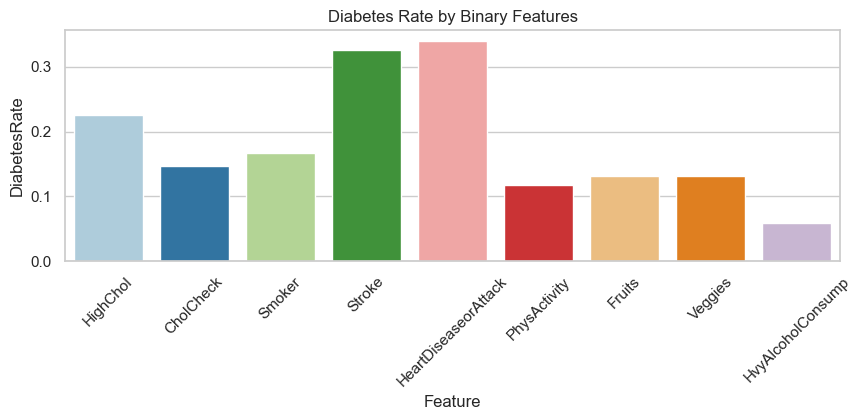

,Diabetes Percentage
HeartDiseaseorAttack,0.339145
Stroke,0.325920
HighChol,0.226193
Smoker,0.166305
CholCheck,0.146490
Veggies,0.132173
Fruits,0.130878
PhysActivity,0.118059
HvyAlcoholConsump,0.059226


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

binary_features = ['HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

# Calculate percentages of diabetes by binary factor
diabetes_rates = {}
for feature in binary_features:
    rate = diabetes_data.groupby(feature)['Diabetes'].mean()[1] 
    diabetes_rates[feature] = rate

rate_df = pd.DataFrame(list(diabetes_rates.items()), columns=['Feature', 'DiabetesRate'])

# Plot Diabetes Rate by Binary Feature
plt.figure(figsize=(10,3))
sns.barplot(x='Feature', y='DiabetesRate', data=rate_df)
plt.title('Diabetes Rate by Binary Features')
plt.xticks(rotation=45)
plt.show()

# Print table of percentages
diabetes_percentage_table = pd.DataFrame.from_dict(diabetes_rates, orient='index', columns=['Diabetes Percentage'])
diabetes_percentage_table = diabetes_percentage_table.sort_values(by='Diabetes Percentage', ascending=False)
diabetes_percentage_table

There are a lot of clinical patterns uncovered here:
- The highest diabetes prevalence is among individuals who have heart disease/attack (33.9%) or stroke (32.6%)
- 22.6% of individuals with high cholesterol have diabetes
    - interestingly, only 14.6% of individuals who've had their cholesterol levels checked have diabetes 
- 16.6% of individuals who identified themselves as smokers have diabetes
- The lowest diabetes prevalence is among individuals who regularly eat veggies (13.2%), fruits (13.1%), and perform physical activity (11.8%)
- Surprisingly, only 5.9% of individuals who identified themselves as heavy alcohol consumers have diabetes

**Diabetes Status by BMI**

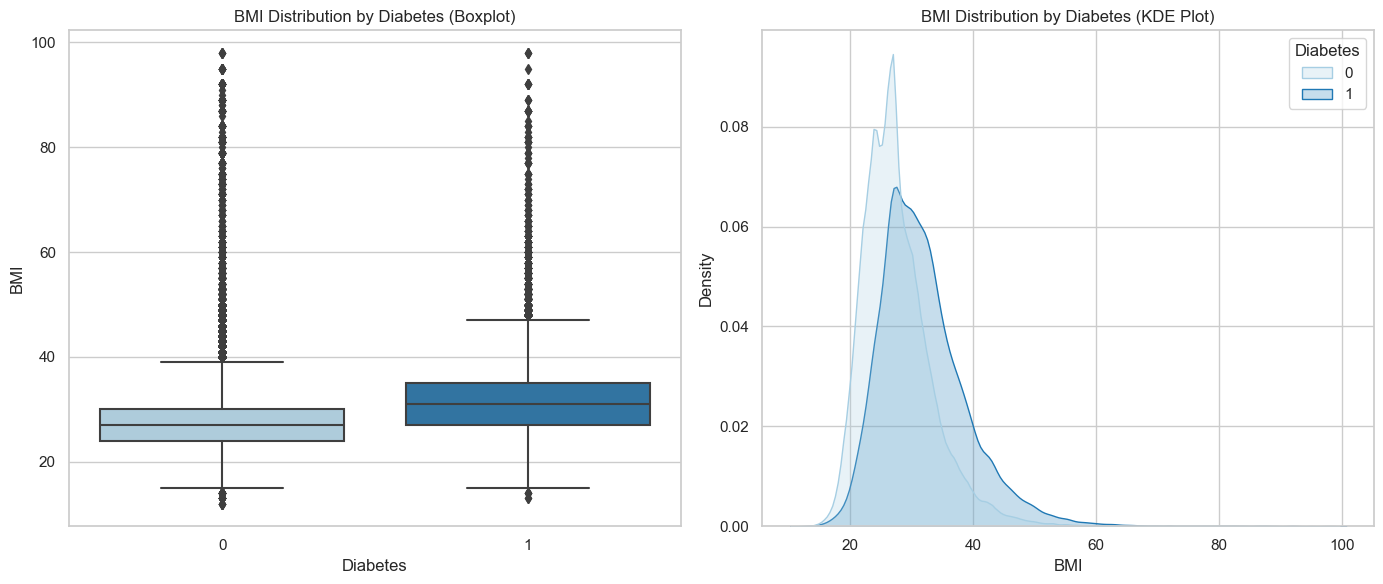

BMI Summary Statistics by Diabetes Status


,count,mean,std,min,25%,50%,75%,max
Diabetes,,,,,,,,
0,213703.0,27.742521,6.260993,12.0,24.0,27.0,30.0,98.0
1,35346.0,31.944011,7.363401,13.0,27.0,31.0,35.0,98.0


In [ ]:
# Plot BMI Distribution by Diabetes
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Boxplot
sns.boxplot(x='Diabetes', y='BMI', data=diabetes_data, ax=axes[0])
axes[0].set_title('BMI Distribution by Diabetes (Boxplot)')
axes[0].set_xlabel('Diabetes')
axes[0].set_ylabel('BMI')

# KDE Plot
sns.kdeplot(data=diabetes_data, x='BMI', hue='Diabetes', fill=True, common_norm=False, ax=axes[1])
axes[1].set_title('BMI Distribution by Diabetes (KDE Plot)')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# Print summary statistics by diabetes status
print("BMI Summary Statistics by Diabetes Status")
diabetes_data.groupby('Diabetes')['BMI'].describe()

The findings suggest that there is a strong positive association between higher BMI and diabetes:
- Individuals with diabetes have a higher average BMI (mean=31.9, std=7.4) than individuals without diabetes (mean=27.7, std=6.3)
- The distribution of BMI is shifted higher (more to the right) among individuals with diabetes
- Individuals with diabetes have higher elevated 25th, 50th, and 75th percentile values across the board

#### Data Cleaning 

Next, let's clean the data to ensure it is consistent and formatted properly for training the neural network.

**Balance the Dataset**

We saw that the target variable `Diabetes` is imbalanced, with the majority of individuals not having diabetes (84.2% vs. 13.9% class distribution). While this distribution reflects the real-world scenario, our models may become biased toward the majority class. 

For example, if the model predicts that every individual does not have diabetes (the majority class), we would expect to achieve ~84.2% accuracy. On paper, that sounds really good, but in practice, it is very misleading. Remember, our goal is to identify individuals at risk for diabetes! 

There are many techniques to improve sensitivity to individuals with diabetes (minority class), such as oversampling the minority class, undersampling the majority class, or hybrid approaches. In this project, we'll undersample the majority class to balance the dataset such that the ratio of individuals with and without diabetes is 50/50.

In [ ]:
# Balance the dataset 50/50
diabetics = diabetes_data[diabetes_data['Diabetes'] == 1] # Dataset of diabetic individuals
nondiabetics = diabetes_data[diabetes_data['Diabetes'] == 0] # Dataset of nondiabetic individuals

# Undersample nondiabetic individuals + keep all diabetic individuals
nondiabetics_sampled = nondiabetics.sample(n=len(diabetics), random_state=42) 
diabetes_data_balanced = pd.concat([diabetics, nondiabetics_sampled])

# Shuffle the combined dataset + verify balance
diabetes_data_balanced = diabetes_data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
print(diabetes_data_balanced['Diabetes'].value_counts())

Diabetes
0    35346
1    35346
Name: count, dtype: int64


**Numerically Encode Object Columns**

Next, we'll need to numerically encode the following columns: `Sex`, `Age`, `Education`, and `Income`
- `Sex` is encoded as a binary value (`1` or `0`)
- `Age`, `Education`, and `Income` are encoded as ordinal values starting from `1`

In [ ]:
# Sex
diabetes_data_balanced['Sex'] = diabetes_data_balanced['Sex'].replace({'Female':0, 'Male':1})

# Age
age_mapping = {"18-24":1, "25-29":2, "30-34":3, "35-39":4, "40-44":5, "45-49":6, 
               "50-54":7, "55-59":8, "60-64":9, "65-69":10, "70-74":11, "75-79":12, "80+":13}

diabetes_data_balanced['Age'] = diabetes_data_balanced['Age'].map(age_mapping)

# Education
education_mapping = {"Never attended school or only kindergarten":1,
                     "Grades 1-8 (Elementary)":2,
                     "Grades 9-11 (Some high school)":3,
                     "Grade 12 or GED (High school graduate)":4,
                     "College 1-3 years (Some college/technical school)":5,
                     "College 4+ years (College graduate)":6}

diabetes_data_balanced['Education'] = diabetes_data_balanced['Education'].map(education_mapping)

# Income
income_mapping = {"Less than $10,000":1,
                  "Less than $15,000":2,
                  "Less than $20,000":3,
                  "Less than $25,000":4,
                  "Less than $35,000":5,
                  "Less than $50,000":6,
                  "Less than $75,000":7,
                  "$75,000 or more":8}

diabetes_data_balanced['Income'] = diabetes_data_balanced['Income'].map(income_mapping)

**Numerically Encode Binary Columns**

Next, we'll numerically encode the following binary columns with `yes` or `no` values: 
- `HighBP`, `HighChol`, `CholCheck`, `Smoker`, `Stroke`, `HeartDiseaseorAttack`, `PhysActivity`, `Fruits`, `Veggies`, `HvyAlcoholConsump`, `AnyHealthcare`, `NoDocbcCost`, `DiffWalk`

In [ ]:
# Binary features
binary_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 
                  'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 
                  'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                  'NoDocbcCost', 'DiffWalk']

diabetes_data_balanced[binary_columns] = diabetes_data_balanced[binary_columns].replace({"No":0, "Yes":1})

In [ ]:
diabetes_data_balanced['NoDocbcCost'].value_counts()

NoDocbcCost
0    64130
1     6562
Name: count, dtype: int64

**Feature Selection**

Feature selection is an important pre-processing step to improve model performance by removing irrelevant features.

We'll remove the following features:
- `CholCheck`: Whether the individual had their cholesterol checked in the past 5 years 
    - low variance, most individuals have had their cholesterol checked
    - not as directly predictive of diabetes as other factors, like having high cholesterol
- `NoDocbcCost`: Whether the individual could not see a doctor in the past year because of cost
    - low variance, most individuals could see a doctor in the past year
    - more related to healthcare access, like having healthcare coverage

In [ ]:
# Drop unimportant features
drop_columns = ['CholCheck', 'NoDocbcCost']
diabetes_data_balanced = diabetes_data_balanced.drop(labels=drop_columns, axis=1)

In [ ]:
# Preview before training
diabetes_data_balanced.head()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,0,1,29.0,1,0,0,1,1,1,0,1,2.0,0.0,0.0,0,1,5,6,8,0
1,1,1,39.0,0,0,0,0,1,1,0,1,5.0,0.0,30.0,1,1,8,5,5,1
2,1,1,37.0,0,0,0,0,1,1,0,1,4.0,7.0,1.0,1,0,10,4,3,1
3,1,0,27.0,0,0,0,1,1,1,0,1,3.0,0.0,15.0,0,1,10,6,8,1
4,0,0,20.0,0,0,0,1,1,1,0,1,1.0,0.0,0.0,0,0,3,6,8,0


### Classification Task - Predicting Diabetes

Let's build and train our neural network to predict diabetes!

**Pre-processing**

1. Select training features to predict `Diabetes` column.
2. Convert the data into tensors.
3. Split the data into training and testing sets.

In [ ]:
# Select training features
remove_cols = ['Diabetes']
train_features = [x for x in diabetes_data_balanced.columns if x not in remove_cols]
print("Number of training features:", len(train_features))

Number of training features: 19


In [ ]:
# Convert into tensors
import torch
X = torch.tensor(diabetes_data_balanced[train_features].values, dtype=torch.float)
y = torch.tensor(diabetes_data_balanced['Diabetes'].values, dtype=torch.float).view(-1,1)

In [ ]:
# Split the data into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80,
                                                    test_size=0.20,
                                                    random_state=42) 

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: torch.Size([56553, 19])
Testing Shape: torch.Size([14139, 19])


**Build the Neural Network Architecture**

In [ ]:
import torch.nn as nn
import torch.optim as optim
torch.manual_seed(42)

# NN architecture
binary_model = nn.Sequential(
    nn.Linear(19, 48),
    nn.ReLU(),
    nn.Linear(48, 16),
    nn.ReLU(),
    nn.Linear(16, 12),
    nn.GELU(),
    nn.Linear(12, 1),
    nn.Sigmoid()
)

# Initialize loss function + optimizer
loss = nn.BCELoss()
optimizer = optim.Adam(binary_model.parameters(), lr=0.003)

C:\Users\nopro\anaconda3\envs\CODECADEMY_ENV_NEW\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Training Loop**

In [ ]:
# Training loop
from sklearn.metrics import accuracy_score
num_epochs = 1000
for epoch in range(num_epochs):
    binary_model.train()
    predictions = binary_model(X_train)
    BCELoss = loss(predictions, y_train)
    BCELoss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch + 1) % 100 == 0:
        # Track the training accuracy
        predicted_labels = (predictions >= 0.5).int()
        accuracy = accuracy_score(y_train, predicted_labels)
        print(f'Epoch [{epoch+1}/{num_epochs}], BCELoss: {BCELoss.item():.4f}, Accuracy: {accuracy.item():.4f}')

Epoch [100/1000], BCELoss: 0.5110, Accuracy: 0.7471
Epoch [200/1000], BCELoss: 0.5028, Accuracy: 0.7536
Epoch [300/1000], BCELoss: 0.5000, Accuracy: 0.7555
Epoch [400/1000], BCELoss: 0.4989, Accuracy: 0.7559
Epoch [500/1000], BCELoss: 0.4984, Accuracy: 0.7564
Epoch [600/1000], BCELoss: 0.4984, Accuracy: 0.7561
Epoch [700/1000], BCELoss: 0.4974, Accuracy: 0.7572
Epoch [800/1000], BCELoss: 0.4970, Accuracy: 0.7565
Epoch [900/1000], BCELoss: 0.4971, Accuracy: 0.7569
Epoch [1000/1000], BCELoss: 0.4962, Accuracy: 0.7572


**Testing Set Evaluation**

In [ ]:
# Set the model to evaluation mode
binary_model.eval()

# Generate test set predictions
with torch.no_grad():
    test_predictions = binary_model(X_test)
    test_predicted_labels = (test_predictions >= 0.5).int()

In [ ]:
# Classification report
from sklearn.metrics import accuracy_score, classification_report
test_accuracy = accuracy_score(y_test, test_predicted_labels)
print(f'Accuracy: {test_accuracy.item():.4f}')
        
report = classification_report(y_test, test_predicted_labels)
print("Classification Report:\n", report)

Accuracy: 0.7553
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.70      0.74      7160
         1.0       0.72      0.82      0.77      6979

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.75     14139
weighted avg       0.76      0.76      0.75     14139



#### Key Insights

The neural network shows promising discriminative ability in predicting individuals with diabetes based on health factors, including medical and lifestyle information.

Let's break down the testing set performance:

**Overall Accuracy**

The model achieves an overall accuracy of 75.53%. This means that it correctly predicted 75.53% of all individuals in the out-of-sample testing set, which is promising but requires more in-depth analysis of the classification performance within each class.

**Class 0 Performance (No Diabetes)**

Within individuals who do not have diabetes:
- A precision of 0.80 means that when the network predicted that an individual was non-diabetic, it was correct 80% of the time
- A recall of 0.70 means that the network correctly identified 70% of all non-diabetic individuals
- An F1-score of 0.74 suggests a reasonable balance between precision and recall

**Class 1 Performance (Diabetes)**

Within individuals who do have diabetes:
- A precision of 0.72 means that when the network predicted that an individual was diabetic, it was correct 72% of the time
- A recall of 0.82 means that the network correctly identified 82% of diabetic individuals
- An F1-score of 0.77 suggests a reasonable balance between precision and recall

From the clinical perspective of screening individuals for diabetes, the recall performance for class 1 (detecting the disease) is generally considered the most critical metric because missing a diagnosis (false negative) can lead to delayed treatment, resulting in serious complications.

The 82% recall for the diabetic class is quite good, as the model correctly identified about 4 out of 5 diabetic individuals. While impressive, there are important ethical and practical considerations to consider before implementing the model for any real-world clinical use. Again, any health-related decisions should always be made with the guidance of a qualified healthcare professional!

### Regression Task - Predicting Age

Now, let's build and train a neural network to predict an individual's age!

**Note:** Although the `Age` variable in this dataset is represented as a binned ordinal variable (from 1 to 13), we have deliberately chosen to approach this task as a regression problem. Chronological age is continuous in nature in which regression models may intrinsically be able to capture this ordinal structure better than classification approaches. We'll also need to carefully interpret the regression model's output by mapping the predicted values to approximate age ranges. 

**Pre-processing**

1. Select training features to predict `Age` column.
2. Convert the data into tensors.
3. Split the data into training and testing sets.

In [ ]:
# Select training features
remove_cols = ['Age']
train_features = [x for x in diabetes_data_balanced.columns if x not in remove_cols]

print("Number of training features:", len(train_features))

Number of training features: 19


In [ ]:
# Convert into tensors
import torch
X = torch.tensor(diabetes_data_balanced[train_features].values, dtype=torch.float)
y = torch.tensor(diabetes_data_balanced['Age'].values, dtype=torch.float).view(-1,1)

In [ ]:
# Split the data into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80,
                                                    test_size=0.20,
                                                    random_state=0) 

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: torch.Size([56553, 19])
Testing Shape: torch.Size([14139, 19])


**Linear Regression Baseline**

Let's also build a linear regression baseline to compare the neural network performance against.

In [ ]:
# Linear regression baseline
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate linear regression with MSE
from sklearn.metrics import mean_squared_error
linear_test_predictions = linear_model.predict(X_test)
linear_test_mse = mean_squared_error(y_test, linear_test_predictions)
print("Linear Regression - Test Set MSE:", linear_test_mse)

Linear Regression - Test Set MSE: 6.169563


**Build the Neural Network Architecture**

In [ ]:
import torch.nn as nn
import torch.optim as optim
torch.manual_seed(42)

# NN architecture
regression_model = nn.Sequential(
    nn.Linear(19, 48),
    nn.ReLU(),
    nn.Linear(48, 24),
    nn.ReLU(),
    nn.Linear(24, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

# Initialize loss function + optimizer
loss = nn.MSELoss()
optimizer = optim.Adam(regression_model.parameters(), lr=0.003)

**Training Loop**

In [ ]:
# Training loop
num_epochs = 1000 
for epoch in range(num_epochs):
    regression_model.train()
    outputs = regression_model(X_train)
    mse = loss(outputs, y_train) 
    mse.backward()
    optimizer.step() 
    optimizer.zero_grad() 

    # Track of the training loss
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], MSE Loss: {mse.item()}')

Epoch [100/1000], MSE Loss: 9.262872695922852
Epoch [200/1000], MSE Loss: 7.173412322998047
Epoch [300/1000], MSE Loss: 6.593778133392334
Epoch [400/1000], MSE Loss: 5.91213846206665
Epoch [500/1000], MSE Loss: 5.67910099029541
Epoch [600/1000], MSE Loss: 5.591210842132568
Epoch [700/1000], MSE Loss: 5.531044960021973
Epoch [800/1000], MSE Loss: 5.473059177398682
Epoch [900/1000], MSE Loss: 5.433137893676758
Epoch [1000/1000], MSE Loss: 5.414791584014893


**Testing Set Evaluation**

In [ ]:
# Set the model to evaluation mode
regression_model.eval()

# Generate test set predictions + test set MSE
with torch.no_grad():
    nn_test_predictions = regression_model(X_test)
    nn_test_mse = loss(nn_test_predictions, y_test)

print("Linear Regression - Test Set MSE:", linear_test_mse.item())
print('Neural Network - Test Set MSE:', nn_test_mse.item()) 

Linear Regression - Test Set MSE: 6.169562816619873
Neural Network - Test Set MSE: 5.579946041107178


**Example Prediction**

In [ ]:
obs = 0
print("Neural Network Prediction:", nn_test_predictions[obs])
print("Linear Regression Prediction:", linear_test_predictions[obs])
print("Ground Truth:", y_test[obs])

Neural Network Prediction: tensor([10.7624])
Linear Regression Prediction: [11.6764965]
Ground Truth: tensor([9.])


#### Key Insights

The neural network outperforms the linear regression baseline with an MSE of 5.58 compared to 6.17 on the out-of-sample testing set (roughly 10% more). This improvement indicates that the neural network is better at capturing more complex, non-linear relationships in the data than linear regression, meaning that it helps better predict individuals into appropriate age groups.

Let's take a look at the example prediction:
- Neural network: 10.76
- Linear regression 11.68
- Ground truth: 9.0

Both models seem to overestimate the individual's actual age group, but the neural network's prediction is closer to the ground truth. This suggests that there could be a systematic bias towards predicting older age groups, but we'll have to perform a more in-depth analysis. 

Specifically, the neural network's prediction of 10.76 suggests that it predicts a category between 10 and 11. We may consider rounding the prediction to the nearest integer, 11. Still, the general sense is that the model predicts that this individual is older (between 65-75) than their actual age group, 9 (between 60-64). This could suggest that the individual's health factors (their medical and lifestyle information) are more consistent with someone in an older age group. 

This accelerated aging signal could help identify individuals who might benefit from preventative care and/or lifestyle interventions to decrease their risk of age-related complications.

#### Conclusion

In conclusion, our project successfully developed neural networks to address two health-related problems: predicting diabetes and age regression. The predictive models' performance demonstrates the potential for machine learning, specifically neural networks, as a viable tool for initial healthcare screenings. 

Future work could explore using different model architectures, dataset balancing techniques, feature selection techniques, collecting more data, and applying more rigorous testing. Remember, these models are not intended for real-world medical applications and should not be relied upon for diagnosing, predicting, or managing diabetes or any other health outcomes. Any health-related decisions should always be made with the guidance of a qualified healthcare professional!